In [9]:
from scipy.stats import norm, gmean
import numpy as np
import math
from numba import jit, prange
import matplotlib.pyplot as plt

# Структурные продукты с полной защитой капитала

## СП с использованием азиатских опционов

Пример 1. Имеется 0,1 млн рублей, которые клиент готов инвестировать на 1 год. Текущая цена акции 100 руб., прогнозируется рост акции. Волатильность акции – 30%, депозитная процентная ставка и безрисковая процентная ставка – 7%. Периодичность наблюдения – 1 день. Постройте структурный продукт с полной гарантией возврата инвестированного капитала и азиатского опциона call.

In [10]:
def Geometric_Average_Rate_Call(S, K , T , r , b , sigma):
  sigmaA = sigma/np.sqrt(3)
  bA = (b - sigma**2/6)/2
  d1 = (np.log(S/K)+(bA + sigmaA**2/2)*T)/(sigmaA*np.sqrt(T))
  d2 = d1 - sigmaA * np.sqrt(T)
  return S * np.exp((bA - r)*T) * norm.cdf(d1) - K * np.exp(-r*T)*norm.cdf(d2)

S = 100
K = 100
T = 1
r = 0.07
q = 0.0
sigma = 0.3

print ('Геометрическая среднее. Стоимость азиатского опциона колл =', Geometric_Average_Rate_Call(S , K , T , r , r-q , sigma))
# 7.906075677449117

Геометрическая среднее. Стоимость азиатского опциона колл = 7.906075677449117


## Задача

Задача. В услових примера вычислите коэффициент участия.

Ответ: PR = 85.5%

In [ ]:
def Geometric_Average_Rate_Call(S, K, T, r, b, sigma):
    """
    S: Текущая цена акции
    K: Страйк цена опциона
    T: Срок опциона (в годах)
    r: Безрисковая процентная ставка
    b: Дивидендная доходность или ставка финансирования
    sigma: Волатильность акции
    """
    sigmaA = sigma / np.sqrt(3)
    bA = (b - (sigma ** 2) / 6) / 2
    d1 = (np.log(S / K) + (bA + (sigmaA ** 2) / 2) * T) / (sigmaA * np.sqrt(T))
    d2 = d1 - sigmaA * np.sqrt(T)
    option_price = S * np.exp((bA - r) * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return option_price

initial_investment = 100_000 
S = 100                       
K = 100                       
T = 1                          
r = 0.07                      
q = 0.0                       
sigma = 0.3                   


PV = initial_investment * np.exp(-r * T)
print(f"Приведенная стоимость гарантии капитала (PV) = {PV:.2f} руб.")

option_investment = initial_investment - PV
print(f"Сумма, доступная для покупки опциона = {option_investment:.2f} руб.")

option_price = Geometric_Average_Rate_Call(S, K, T, r, r - q, sigma)
print(f"Стоимость одного азиатского опциона колл = {option_price:.6f} руб.")

num_options = option_investment / option_price
print(f"Количество приобретаемых опционов = {num_options:.2f} шт.")

total_exposure = num_options * S
print(f"Общая экспозиция к базовому активу = {total_exposure:.2f} руб.")

PR = (total_exposure / initial_investment) * 100
print(f"Коэффициент участия (PR) = {PR:.1f}%")


Приведенная стоимость гарантии капитала (PV) = 93239.38 руб.
Сумма, доступная для покупки опциона = 6760.62 руб.
Стоимость одного азиатского опциона колл = 7.906076 руб.
Количество приобретаемых опционов = 855.12 шт.
Общая экспозиция к базовому активу = 85511.68 руб.
Коэффициент участия (PR) = 85.5%


## Задача

Задача. Имеется 0,1 млн рублей, которые клиент готов инвестировать на 1 год. Текущая цена акции 100 руб., прогнозируется падение акции. Волатильность акции – 30%, депозитная процентная ставка и безрисковая процентная ставка – 7%. Периодичность наблюдения – 1 день. Постройте структурный продукт с полной гарантией возврата инвестированного капитала и азиатского опциона put.

Постройте графики выплат для опциона колл и пут. Сделайте выводы.

Приведенная стоимость гарантии капитала (PV) = 93239.38 руб.
Сумма, доступная для покупки опциона = 6760.62 руб.
Стоимость одного азиатского опциона пут = 5.306411 руб.
Количество приобретаемых опционов пут = 1274.05 шт.
Общая экспозиция к базовому активу (пут) = 127404.72 руб.
Коэффициент участия (PR) для пут опциона = 127.4%
Стоимость одного азиатского опциона колл = 7.906076 руб.
Количество приобретаемых опционов колл = 855.12 шт.
Общая экспозиция к базовому активу (колл) = 85511.68 руб.
Коэффициент участия (PR) для колл опциона = 85.5%


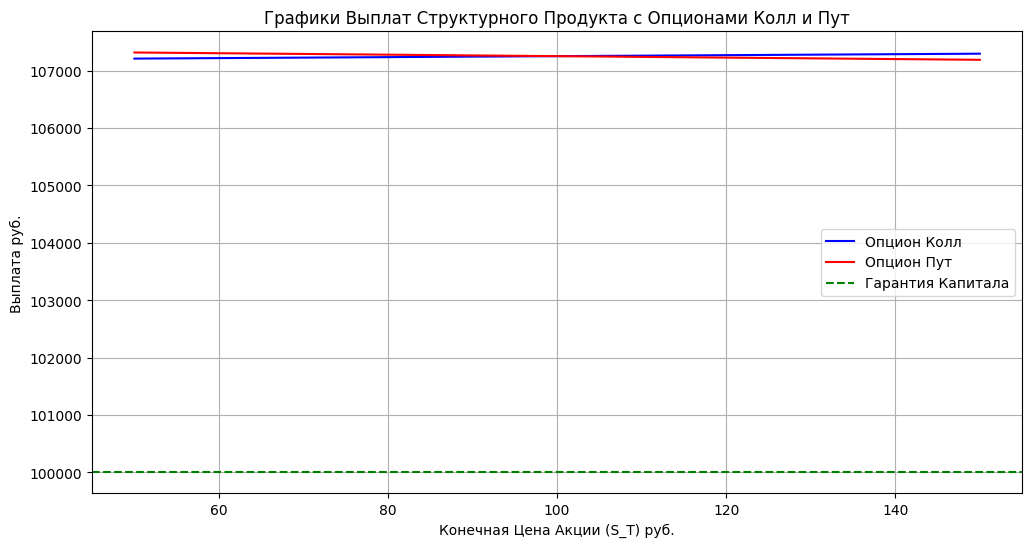


### Выводы:
- Коэффициент участия для опциона пут составляет 127.4%, что означает, что клиент участвует в снижении цены акции на 127.4% от начальной инвестиции.
- Коэффициент участия для опциона колл составляет 85.5%, что соответствует участию в росте цены акции на 85.5% от начальной инвестиции.
- Полная гарантия возврата капитала обеспечивает безопасность начальной инвестиции независимо от движения цены акции.
- Графики выплат показывают, что при падении цены акции ниже 100 руб. опцион пут приносит дополнительную выгоду, а при росте выше 100 руб. опцион колл активируется, обеспечивая участие в положительном движении рынка.
- Структурный продукт позволяет клиенту участвовать в потенциальных выгодах от движения цены акции в обоих направлениях при сохранении капитальной гарантии.


In [ ]:

def Geometric_Average_Rate_Call(S, K, T, r, b, sigma):
    """
    S: Текущая цена акции
    K: Страйк цена опциона
    T: Срок опциона (в годах)
    r: Безрисковая процентная ставка
    b: Дивидендная доходность или ставка финансирования
    sigma: Волатильность акции
    """
    sigmaA = sigma / np.sqrt(3)
    bA = (b - (sigma ** 2) / 6) / 2
    d1 = (np.log(S / K) + (bA + (sigmaA ** 2) / 2) * T) / (sigmaA * np.sqrt(T))
    d2 = d1 - sigmaA * np.sqrt(T)
    option_price = S * np.exp((bA - r) * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return option_price

def Geometric_Average_Rate_Put(S, K, T, r, b, sigma):
    """
    S: Текущая цена акции
    K: Страйк цена опциона
    T: Срок опциона (в годах)
    r: Безрисковая процентная ставка
    b: Дивидендная доходность или ставка финансирования
    sigma: Волатильность акции
    """
    sigmaA = sigma / np.sqrt(3)
    bA = (b - (sigma ** 2) / 6) / 2
    d1 = (np.log(S / K) + (bA + (sigmaA ** 2) / 2) * T) / (sigmaA * np.sqrt(T))
    d2 = d1 - sigmaA * np.sqrt(T)
    option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp((bA - r) * T) * norm.cdf(-d1)
    return option_price


PV = initial_investment * np.exp(-r * T)
print(f"Приведенная стоимость гарантии капитала (PV) = {PV:.2f} руб.")

option_investment = initial_investment - PV
print(f"Сумма, доступная для покупки опциона = {option_investment:.2f} руб.")

option_put_price = Geometric_Average_Rate_Put(S, K, T, r, r - q, sigma)
print(f"Стоимость одного азиатского опциона пут = {option_put_price:.6f} руб.")

num_put_options = option_investment / option_put_price
print(f"Количество приобретаемых опционов пут = {num_put_options:.2f} шт.")

total_put_exposure = num_put_options * S
print(f"Общая экспозиция к базовому активу (пут) = {total_put_exposure:.2f} руб.")

PR_put = (total_put_exposure / initial_investment) * 100
print(f"Коэффициент участия (PR) для пут опциона = {PR_put:.1f}%")

option_call_price = Geometric_Average_Rate_Call(S, K, T, r, r - q, sigma)
num_call_options = option_investment / option_call_price
total_call_exposure = num_call_options * S
PR_call = (total_call_exposure / initial_investment) * 100

print(f"Стоимость одного азиатского опциона колл = {option_call_price:.6f} руб.")
print(f"Количество приобретаемых опционов колл = {num_call_options:.2f} шт.")
print(f"Общая экспозиция к базовому активу (колл) = {total_call_exposure:.2f} руб.")
print(f"Коэффициент участия (PR) для колл опциона = {PR_call:.1f}%")

S_T = np.linspace(50, 150, 500)

call_payout = initial_investment * np.exp(r * T) + (total_call_exposure / initial_investment) * (S_T - K)
call_payout = np.maximum(call_payout, initial_investment)

put_payout = initial_investment * np.exp(r * T) + (total_put_exposure / initial_investment) * (K - S_T)
put_payout = np.maximum(put_payout, initial_investment)

plt.figure(figsize=(12, 6))
plt.plot(S_T, call_payout, label='Опцион Колл', color='blue')
plt.plot(S_T, put_payout, label='Опцион Пут', color='red')
plt.axhline(y=initial_investment, color='green', linestyle='--', label='Гарантия Капитала')
plt.title('Графики Выплат Структурного Продукта с Опционами Колл и Пут')
plt.xlabel('Конечная Цена Акции (S_T) руб.')
plt.ylabel('Выплата руб.')
plt.legend()
plt.grid(True)
plt.show()

print("\n### Выводы:")
print(f"- Коэффициент участия для опциона пут составляет {PR_put:.1f}%, что означает, что клиент участвует в снижении цены акции на {PR_put:.1f}% от начальной инвестиции.")
print(f"- Коэффициент участия для опциона колл составляет {PR_call:.1f}%, что соответствует участию в росте цены акции на {PR_call:.1f}% от начальной инвестиции.")
print(f"- Полная гарантия возврата капитала обеспечивает безопасность начальной инвестиции независимо от движения цены акции.")
print(f"- Графики выплат показывают, что при падении цены акции ниже 100 руб. опцион пут приносит дополнительную выгоду, а при росте выше 100 руб. опцион колл активируется, обеспечивая участие в положительном движении рынка.")
print(f"- Структурный продукт позволяет клиенту участвовать в потенциальных выгодах от движения цены акции в обоих направлениях при сохранении капитальной гарантии.")



## Задача

Задача. Проведите исследование и сравните влияние периодичности наблюдения (1 день, 1 неделя, 1 месяц) на
*   стоимость азиатского опциона,
*   волатильность.

Сделайте выводы, подкрепите выводы иллюстративными графиками.

### Стоимость Геометрических Азиатских Опционов Колл:
Ежедневно (252): 9.7904 руб., Эффективная Волатильность: 0.2126
Еженедельно (52): 9.8110 руб., Эффективная Волатильность: 0.2142
Ежемесячно (12): 9.9058 руб., Эффективная Волатильность: 0.2208

### Стоимость Геометрических Азиатских Опционов Пут:
Ежедневно (252): 6.4864 руб., Эффективная Волатильность: 0.2126
Еженедельно (52): 6.5717 руб., Эффективная Волатильность: 0.2142
Ежемесячно (12): 6.9183 руб., Эффективная Волатильность: 0.2208


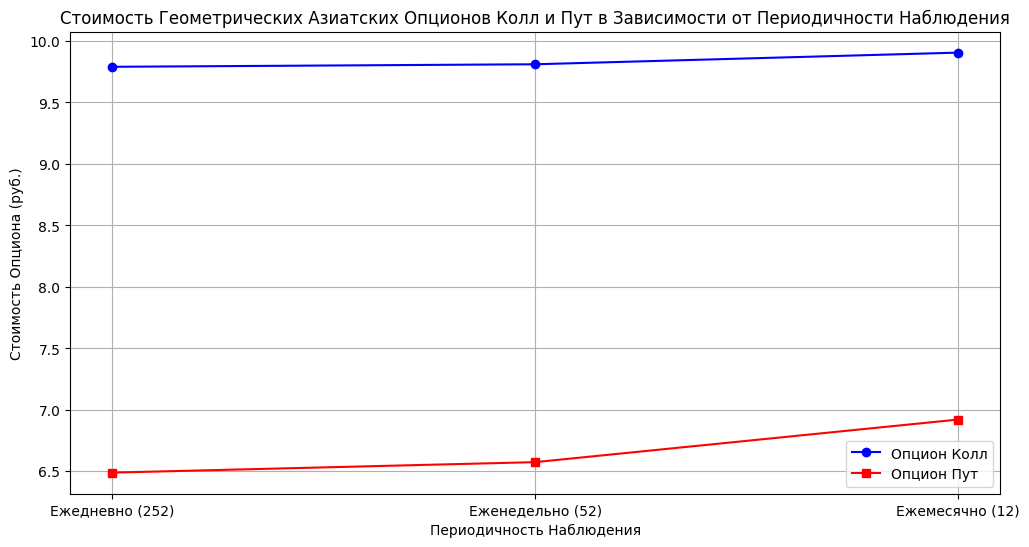

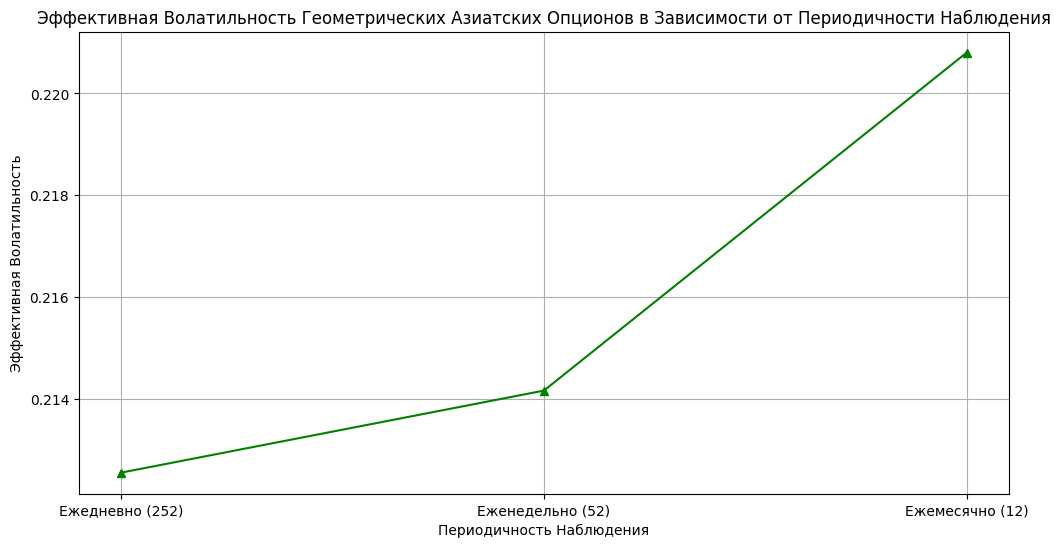

In [ ]:
def Geometric_Average_Rate_Call(S, K, T, r, b, sigma, n):
    """
    S: Текущая цена акции
    K: Страйк цена опциона
    T: Срок опциона (в годах)
    r: Безрисковая процентная ставка
    b: Дивидендная доходность или ставка финансирования
    sigma: Волатильность акции
    n: Количество наблюдений в году
    """
    sigma_sq = sigma ** 2
    sigma_A = sigma * np.sqrt((n + 1) / (2 * n))
    b_A = 0.5 * (b - sigma_sq / (n + 1))
    d1 = (np.log(S / K) + (b_A + 0.5 * sigma_A ** 2) * T) / (sigma_A * np.sqrt(T))
    d2 = d1 - sigma_A * np.sqrt(T)
    option_price = S * np.exp((b_A - r) * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return option_price

def Geometric_Average_Rate_Put(S, K, T, r, b, sigma, n):
    """
    S: Текущая цена акции
    K: Страйк цена опциона
    T: Срок опциона (в годах)
    r: Безрисковая процентная ставка
    b: Дивидендная доходность или ставка финансирования
    sigma: Волатильность акции
    n: Количество наблюдений в году
    """
    sigma_sq = sigma ** 2
    sigma_A = sigma * np.sqrt((n + 1) / (2 * n))
    b_A = 0.5 * (b - sigma_sq / (n + 1))
    d1 = (np.log(S / K) + (b_A + 0.5 * sigma_A ** 2) * T) / (sigma_A * np.sqrt(T))
    d2 = d1 - sigma_A * np.sqrt(T)
    option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp((b_A - r) * T) * norm.cdf(-d1)
    return option_price

frequencies = {
    'Ежедневно (252)': 252,
    'Еженедельно (52)': 52,
    'Ежемесячно (12)': 12
}

results_call = {'Frequency': [], 'Option Price': [], 'Effective Volatility': []}
results_put = {'Frequency': [], 'Option Price': [], 'Effective Volatility': []}

for freq_label, n in frequencies.items():
    
    sigma_A = sigma * np.sqrt((n + 1) / (2 * n))
    
    call_price = Geometric_Average_Rate_Call(S, K, T, r, r - q, sigma, n)
    put_price = Geometric_Average_Rate_Put(S, K, T, r, r - q, sigma, n)
    

    results_call['Frequency'].append(freq_label)
    results_call['Option Price'].append(call_price)
    results_call['Effective Volatility'].append(sigma_A)
    
    results_put['Frequency'].append(freq_label)
    results_put['Option Price'].append(put_price)
    results_put['Effective Volatility'].append(sigma_A)

print("### Стоимость Геометрических Азиатских Опционов Колл:")
for i in range(len(frequencies)):
    print(f"{results_call['Frequency'][i]}: {results_call['Option Price'][i]:.4f} руб., Эффективная Волатильность: {results_call['Effective Volatility'][i]:.4f}")

print("\n### Стоимость Геометрических Азиатских Опционов Пут:")
for i in range(len(frequencies)):
    print(f"{results_put['Frequency'][i]}: {results_put['Option Price'][i]:.4f} руб., Эффективная Волатильность: {results_put['Effective Volatility'][i]:.4f}")

plt.figure(figsize=(12, 6))
plt.plot(results_call['Frequency'], results_call['Option Price'], marker='o', label='Опцион Колл', color='blue')
plt.plot(results_put['Frequency'], results_put['Option Price'], marker='s', label='Опцион Пут', color='red')
plt.title('Стоимость Геометрических Азиатских Опционов Колл и Пут в Зависимости от Периодичности Наблюдения')
plt.xlabel('Периодичность Наблюдения')
plt.ylabel('Стоимость Опциона (руб.)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(results_call['Frequency'], results_call['Effective Volatility'], marker='^', color='green')
plt.title('Эффективная Волатильность Геометрических Азиатских Опционов в Зависимости от Периодичности Наблюдения')
plt.xlabel('Периодичность Наблюдения')
plt.ylabel('Эффективная Волатильность')
plt.grid(True)
plt.show()


Пример 2. Оцените стоимость азиатского опциона колл с использованием метода Монте-Карло. При условиях цена базового актива и страйк 100, дата экспирации через 1 год, безрисковая ставка 7%, волатильность 30%. Переодичность наблюдений - 1 день, количество траекторий 1000.

In [ ]:
def getGaussian(mu, sigma, n):

  U = np.random.uniform(0, 1, n)
  V = np.random.uniform(0, 1, n)

  R     = -np.log(U)
  Theta = 2*np.pi*V

  X = np.multiply(np.sqrt(2*R), np.cos(Theta))
  Y = np.multiply(np.sqrt(2*R), np.sin(Theta))

  X = mu + sigma*X
  Y = mu + sigma*Y
  return X, Y

In [ ]:
def gbm_mcs(mu, sigma, S0, T, n, noOfPaths):
  S = []
  delta_t = T/n
  mean = S0 * np.exp((mu+(0.5*sigma**2))*T)
  variance = (S0 ** 2)*np.exp(2*mu*T + 2*(sigma ** 2)*T)*(np.exp(sigma**2)*T-1)
  for i in range(noOfPaths):
    X, Y = getGaussian(0, 1, n)
    dz_t = X
    dW_t = np.sqrt(delta_t) * dz_t
    dX_t = mu * delta_t + sigma * dW_t
    X_t = np.cumsum(dX_t)
    S_t = S0 * np.exp(X_t)
    S.append(S_t)
  S = np.array(S)
  return S, mean, variance

In [16]:
S0    = 100

noOfPaths = 1000
T = 1
n = 250

K = 100
r = 0.07

sigma = 0.3
mu = r - (0.5*sigma**2)

In [17]:
# Simulate a lognormal random walk
S, mean, variance = gbm_mcs(mu, sigma, S0, T, n, noOfPaths)
c = 0.0
for i in range(noOfPaths):
  c = c + max(np.mean(S[i]) - K, 0)
disc = np.exp(-r*T)
#c = disc * (c/noOfPaths)
print ('Монте-Карло моделирование. Стоимость азиатского опциона колл =', disc * (c/noOfPaths))
#print(c)

Монте-Карло моделирование. Стоимость азиатского опциона колл = 8.65115344216194


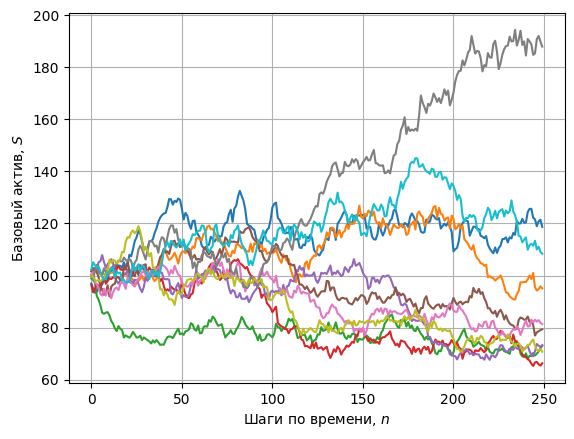

In [18]:
import matplotlib.pyplot as plt

time = list(range(n))
for i in range(10):
  plt.plot(time, S[i])

plt.xlabel('Шаги по времени, $n$')
plt.ylabel('Базовый актив, $S$')
plt.grid(True)
plt.show()

## Задача

Задача. Переписать цикл for и избавиться от использования констант (использовать переменную step).

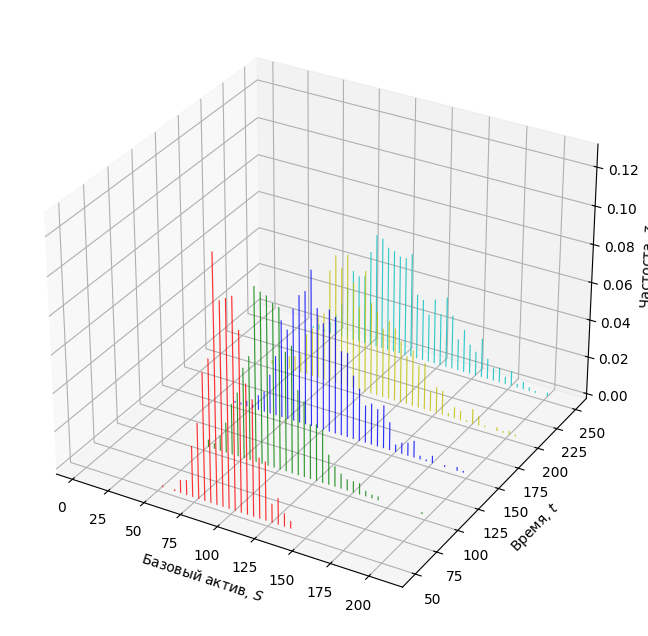

In [19]:
from mpl_toolkits.mplot3d import Axes3D

sd = np.sqrt(variance)
step = 50

# Density plot of the underlying price
fig = plt.figure(figsize=(10,8))
ax  = fig.add_subplot(111,projection='3d')
x   = np.linspace(mean-3*sd, mean+3*sd, step+1)

#time = list(range(n))

for i,c in zip([50,100,150,200,250],['r','g','b','y','c']):
  hist, bins = np.histogram(S[:,i-1],bins = x)
  hist = hist/noOfPaths
  cs = [c] * 50
  ax.bar(x[:-1],hist, i, zdir = 'y', color=cs,alpha=0.8)

ax.set_xlabel('Базовый актив, $S$')
ax.set_ylabel('Время, $t$')
ax.set_zlabel('Частоста, $z$')

plt.show()

## Задача

Задача. Проверить гипотезу о том, что на разных временных шагах гистограммы принадлежат одному распределению.

Монте-Карло моделирование. Стоимость азиатского опциона колл = 8.182041851348126


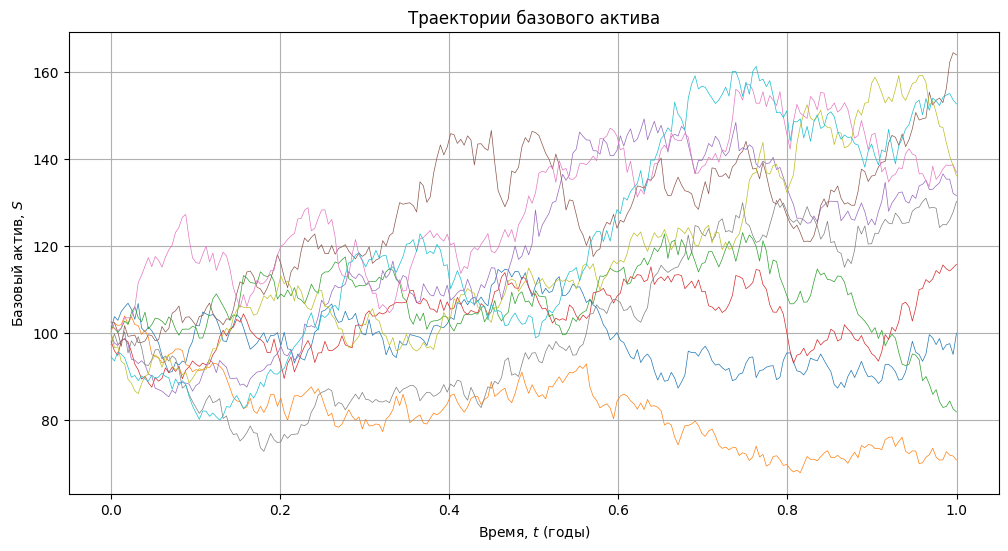

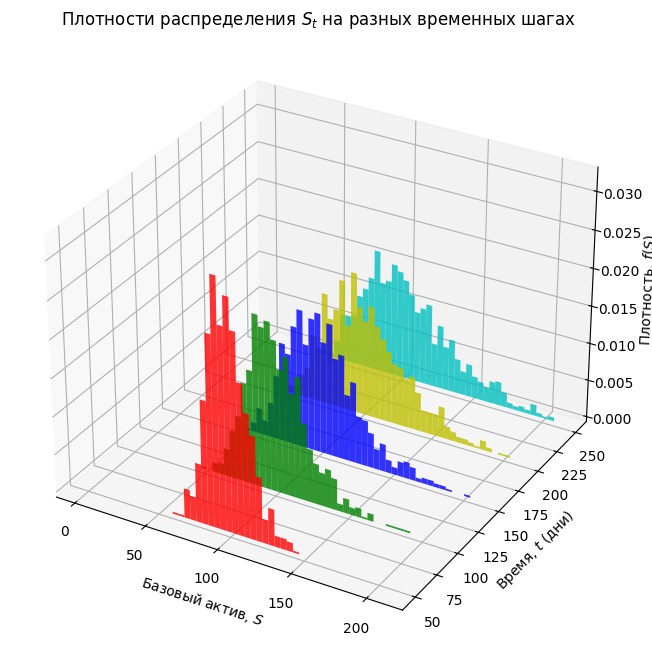

In [ ]:
def getGaussian(mu, sigma, n):
    U = np.random.uniform(0, 1, n)
    V = np.random.uniform(0, 1, n)
    R     = -np.log(U)
    Theta = 2*np.pi*V
    X = np.sqrt(2*R) * np.cos(Theta)
    Y = np.sqrt(2*R) * np.sin(Theta)
    X = mu + sigma * X
    Y = mu + sigma * Y
    return X, Y

def gbm_mcs(mu, sigma, S0, T, n, noOfPaths):
    S = []
    delta_t = T / n
    mean = S0 * np.exp((mu + 0.5 * sigma**2) * T)
    variance = (S0 ** 2) * np.exp(2 * mu * T + 2 * sigma**2 * T) * (np.exp(sigma**2 * T) - 1)
    for i in range(noOfPaths):
        X, Y = getGaussian(0, 1, n)
        dz_t = X
        dW_t = np.sqrt(delta_t) * dz_t
        dX_t = mu * delta_t + sigma * dW_t
        X_t = np.cumsum(dX_t)
        S_t = S0 * np.exp(X_t)
        S.append(S_t)
    S = np.array(S)
    return S, mean, variance

S0    = 100
noOfPaths = 1000
T = 1
n = 250
K = 100
r = 0.07
sigma = 0.3
mu = r - (0.5 * sigma**2)

S, mean, variance = gbm_mcs(mu, sigma, S0, T, n, noOfPaths)

c = np.maximum(np.mean(S, axis=1) - K, 0)
discount_factor = np.exp(-r * T)
call_price_mc = discount_factor * np.mean(c)
print('Монте-Карло моделирование. Стоимость азиатского опциона колл =', call_price_mc)

plt.figure(figsize=(12, 6))
time = np.linspace(0, T, n)
for i in range(10):
    plt.plot(time, S[i], lw=0.5)
plt.xlabel('Время, $t$ (годы)')
plt.ylabel('Базовый актив, $S$')
plt.title('Траектории базового актива')
plt.grid(True)
plt.show()

sd = np.sqrt(variance)
step_size = 50 
steps = list(range(step_size, n + 1, step_size)) 
colors = ['r', 'g', 'b', 'y', 'c']  

x = np.linspace(mean - 3 * sd, mean + 3 * sd, 51) 

fig = plt.figure(figsize=(10, 8))
ax  = fig.add_subplot(111, projection='3d')

for i, c in zip(steps, colors):
    hist, bins = np.histogram(S[:, i-1], bins=x, density=True)
    ax.bar(bins[:-1], hist, zs=i, zdir='y', color=c, alpha=0.8, width=(bins[1]-bins[0]))
    
ax.set_xlabel('Базовый актив, $S$')
ax.set_ylabel('Время, $t$ (дни)')
ax.set_zlabel('Плотность, $f(S)$')
ax.set_title('Плотности распределения $S_t$ на разных временных шагах')
plt.show()


Монте-Карло моделирование. Стоимость азиатского опциона колл = 8.465087845982302


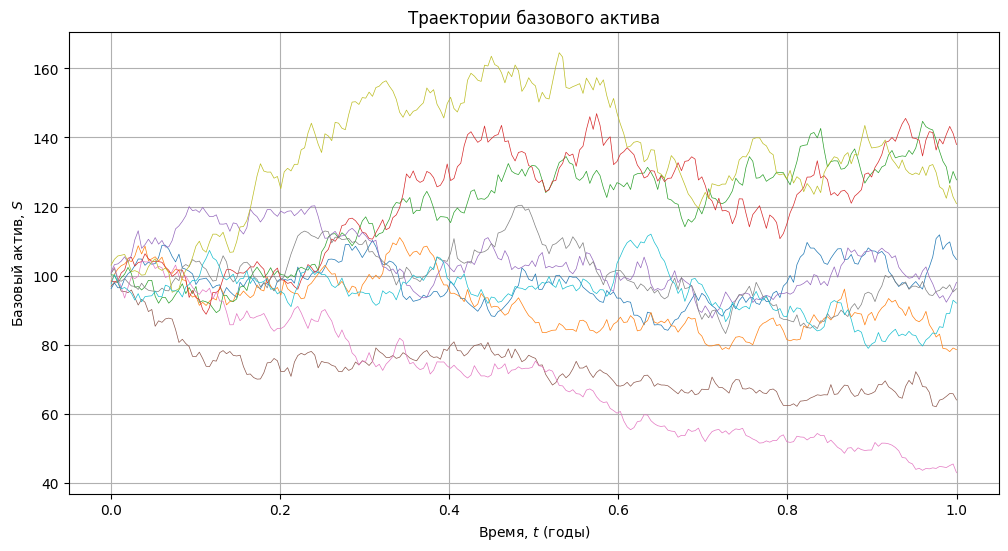

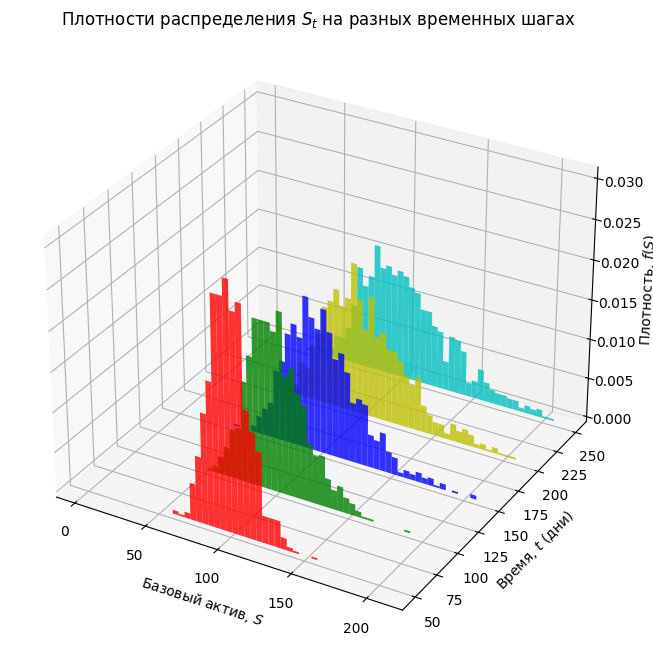


Тест Колмогорова-Смирнова для различных временных шагов:
Шаг 50 и шаг 100: Статистика=0.1000, p-значение=0.0001
 -> Отклоняем нулевую гипотезу: распределения отличаются.

Шаг 50 и шаг 150: Статистика=0.1520, p-значение=0.0000
 -> Отклоняем нулевую гипотезу: распределения отличаются.

Шаг 50 и шаг 200: Статистика=0.1920, p-значение=0.0000
 -> Отклоняем нулевую гипотезу: распределения отличаются.

Шаг 50 и шаг 250: Статистика=0.2040, p-значение=0.0000
 -> Отклоняем нулевую гипотезу: распределения отличаются.

Шаг 100 и шаг 150: Статистика=0.0650, p-значение=0.0292
 -> Отклоняем нулевую гипотезу: распределения отличаются.

Шаг 100 и шаг 200: Статистика=0.1050, p-значение=0.0000
 -> Отклоняем нулевую гипотезу: распределения отличаются.

Шаг 100 и шаг 250: Статистика=0.1210, p-значение=0.0000
 -> Отклоняем нулевую гипотезу: распределения отличаются.

Шаг 150 и шаг 200: Статистика=0.0490, p-значение=0.1812
 -> Нет оснований отклонять нулевую гипотезу: распределения не отличаются.

Шаг 150 и

In [ ]:
from scipy.stats import ks_2samp
from itertools import combinations
def getGaussian(mu, sigma, n):
    U = np.random.uniform(0, 1, n)
    V = np.random.uniform(0, 1, n)
    R     = -np.log(U)
    Theta = 2*np.pi*V
    X = np.sqrt(2*R) * np.cos(Theta)
    Y = np.sqrt(2*R) * np.sin(Theta)
    X = mu + sigma * X
    Y = mu + sigma * Y
    return X, Y

def gbm_mcs(mu, sigma, S0, T, n, noOfPaths):
    S = []
    delta_t = T / n
    mean = S0 * np.exp((mu + 0.5 * sigma**2) * T)
    variance = (S0 ** 2) * np.exp(2 * mu * T + 2 * sigma**2 * T) * (np.exp(sigma**2 * T) - 1)
    for i in range(noOfPaths):
        X, Y = getGaussian(0, 1, n)
        dz_t = X
        dW_t = np.sqrt(delta_t) * dz_t
        dX_t = mu * delta_t + sigma * dW_t
        X_t = np.cumsum(dX_t)
        S_t = S0 * np.exp(X_t)
        S.append(S_t)
    S = np.array(S)
    return S, mean, variance


noOfPaths = 1000
T = 1
n = 250
K = 100
mu = r - (0.5 * sigma**2)

S, mean, variance = gbm_mcs(mu, sigma, S0, T, n, noOfPaths)

c = np.maximum(np.mean(S, axis=1) - K, 0)
discount_factor = np.exp(-r * T)
call_price_mc = discount_factor * np.mean(c)
print('Монте-Карло моделирование. Стоимость азиатского опциона колл =', call_price_mc)

plt.figure(figsize=(12, 6))
time = np.linspace(0, T, n)
for i in range(10):
    plt.plot(time, S[i], lw=0.5)
plt.xlabel('Время, $t$ (годы)')
plt.ylabel('Базовый актив, $S$')
plt.title('Траектории базового актива')
plt.grid(True)
plt.show()

sd = np.sqrt(variance)
step_size = 50  
steps = list(range(step_size, n + 1, step_size))  
colors = ['r', 'g', 'b', 'y', 'c']  

x = np.linspace(mean - 3 * sd, mean + 3 * sd, 51)  

fig = plt.figure(figsize=(10, 8))
ax  = fig.add_subplot(111, projection='3d')

for i, c in zip(steps, colors):
    hist, bins = np.histogram(S[:, i-1], bins=x, density=True)
    ax.bar(bins[:-1], hist, zs=i, zdir='y', color=c, alpha=0.8, width=(bins[1]-bins[0]))
    
ax.set_xlabel('Базовый актив, $S$')
ax.set_ylabel('Время, $t$ (дни)')
ax.set_zlabel('Плотность, $f(S)$')
ax.set_title('Плотности распределения $S_t$ на разных временных шагах')
plt.show()


def test_ks(S, step1, step2):
    data1 = S[:, step1-1]
    data2 = S[:, step2-1]
    statistic, p_value = ks_2samp(data1, data2)
    return statistic, p_value

step_combinations = list(combinations(steps, 2))

print("\nТест Колмогорова-Смирнова для различных временных шагов:")
for (step1, step2) in step_combinations:
    stat, p = test_ks(S, step1, step2)
    print(f"Шаг {step1} и шаг {step2}: Статистика={stat:.4f}, p-значение={p:.4f}")
    if p < 0.05:
        print(f" -> Отклоняем нулевую гипотезу: распределения отличаются.\n")
    else:
        print(f" -> Нет оснований отклонять нулевую гипотезу: распределения не отличаются.\n")


Пример.
В условиях примера 1

1. Вычислите  результаты от инвестирования используя
формулу выплаты:
$$
r_{SP} =
\max\left( r_{SP \min}, r_{SP \min} + PR \times \frac{P_{avg} - S}{S}\right),
$$
здесь $\frac{P_{avg} - S}{S}$ -- доходность базового актива относительно среднего значения $P_{avg}$, $S$ -- цена начала участия, или страйк встроенных опционов (в
простейшем случае он равен цене спот базового актива на момент выпуска продукта, т.е. $P_0$).

2. Постройте продукт со встроенным азиатским опционом, оцененным методом Монте-Карло. Для уменьшения разброса в качестве control variate использовать геометрическое усреднение. Вычислите доверительный интервал.

3. Сравните полученные результаты с результатами предыдущих задач и подкрепите выводы иллюстративными графиками.

In [22]:
def bs_call_exact(t, s0, k, r, sigma):
    dp = 1 / ( sigma * math.sqrt( t ) ) * ( math.log( s0 / k ) + ( r + sigma**2 / 2) * ( t ) )
    dm = dp - sigma * math.sqrt( t )
    return s0 * norm.cdf(dp) - k * math.exp( - r * t ) * norm.cdf(dm)

# profit compare with vanilla call
def call(S, K, tau, vol, r, q):
    d1 = (np.log (S / K) + (r + vol**2 / 2) * tau) / (vol * np.sqrt(tau))
    d2 = d1 - vol * np.sqrt(tau)
    return S * np.exp(-q * tau) * norm.cdf(d1) - K * np.exp (-r * tau) * norm.cdf(d2)

@jit(nopython=True, inline = 'always')
def wiener(t):
    return math.sqrt( t ) * np.random.normal(0, 1)

@jit(nopython=True, inline = 'always')
def st(t, s0, r, sigma):
    return s0 * math.exp( ( r - sigma**2 / 2) * t + sigma * wiener( t ) )

@jit(parallel=True, nopython=False)
def asian_bs_call_mc_geom(n_iters, T, t_steps, S0, K, r, sigma):
    payoff = np.zeros(n_iters)
    avg_S = np.zeros(n_iters)
    m = len(t_steps)
    for i in prange(0, n_iters):
        geom_avg_s = 0
        S0_j = S0
        for j in range(1, m):
            S_j = st( (t_steps[j] - t_steps[j-1] ) * T, S0_j, r, sigma)
            S0_j = S_j
            geom_avg_s += math.log(S_j)
        geom_avg_s = math.exp(geom_avg_s / ( m - 1))
        avg_S[i] = geom_avg_s
        payoff[i] = math.exp(-r * T) * max(geom_avg_s - K , 0)
    return payoff, avg_S

C:\Users\smart\AppData\Local\Temp\ipykernel_1132\1907168319.py:20: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(parallel=True, nopython=False)


In [23]:
N_MC = int(10**5)
T, S0, K, r, sigma = 1, 100, 100, 0.07, 0.3
m = 1000
t_steps = np.array([i/m for i in range(0, m + 1)])
payoff_data, S_data = asian_bs_call_mc_geom(N_MC, T, t_steps, S0, K, r, sigma)
asian_call = np.mean(payoff_data)
print(f"asian call = {asian_call:.4f} +- {1.96 / math.sqrt(n) * np.std(payoff_data):.4f} with 95% prob")

asian call = 7.9492 +- 1.4434 with 95% prob


In [24]:
N = 100000

capital_guarantee = 1
r_sp_min = capital_guarantee - 1
da = N * np.exp(-r * T) * capital_guarantee

Q_1 = (N - da) / asian_call
PR_1 = K * Q_1/ N
S_1 = np.sort(S_data)
r_sp_1 = np.maximum(r_sp_min, r_sp_min + PR_1 *(S_1 - S0) / S0 )

print(f"asian call r_sp_mean = {np.mean(r_sp_1)}, PR = {PR_1}")

asian call r_sp_mean = 0.07250818125421638, PR = 0.8504776159453271


In [25]:
european_call = bs_call_exact(T, S0, K, r, sigma)
Q_2 = (N - da) / european_call
PR_2 = K * Q_2/ N
S_2 = np.sort(np.array([st(T, S0, r, sigma) for i in range(0, N_MC)]))
r_sp_2 = np.maximum(r_sp_min, r_sp_min + PR_2 *(S_2 - S0) / S0 )

print(f"european call r_sp_mean = {np.mean(r_sp_2)}, PR = {PR_2}")

european call r_sp_mean = 0.07253157748245712, PR = 0.44447044652333806


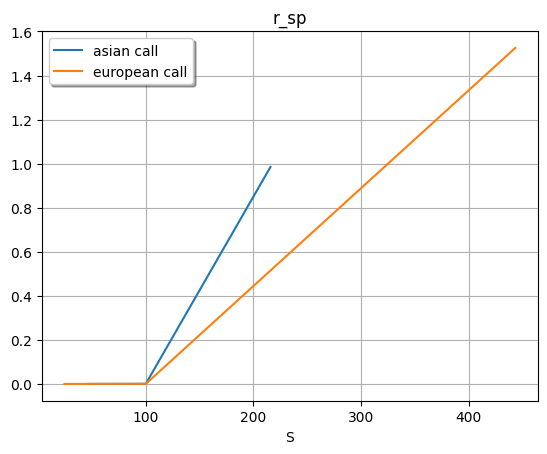

In [26]:
plt.plot(S_1, r_sp_1, label = 'asian call')
plt.plot(S_2, r_sp_2, label = 'european call')

plt.title('r_sp')
plt.xlabel('S')
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.grid(True)

In [27]:
S0 = 100
K = 100
T = 1
r = 0.07
q = 0.0
sigma = 0.3
call_price = Geometric_Average_Rate_Call(S0, K , T , r , r-q , sigma)
print ('Geometric average rate call =', call_price)

cash =100_000
risk_part = cash - cash * np.exp(-r * T)
PR = S0 * round(risk_part / call_price) / cash
print('Participation rate = ', PR)

# task calc Rsp
rsp_min = 1 - 1 # full return guarantee (100%) minus 100%
rsp = np.maximum(rsp_min, rsp_min + PR * (S.mean(axis=1).mean() - S0)/S0)
print('Rsp averaged over 1000 samples = {}%'.format(round(rsp*100,2)))

TypeError: Geometric_Average_Rate_Call() missing 1 required positional argument: 'n'

In [ ]:
# task 2 evaluate asian option price using MC method
import scipy.stats

print('Наблючений:', S.shape)
# geometric averaging
S_means = np.prod(S**(1/S.shape[1]), axis=1)
payoffs = np.exp(-r * T) * np.maximum(S_means - K, 0)
avg_payoff = np.mean(payoffs)
std_error = np.sqrt(np.sum((payoffs - avg_payoff)**2) / (payoffs.shape[0] - 1))
print('Среднее значание функции выплат = ', round(avg_payoff,3))
print('Стандартная ошибка = ', round(std_error, 3))
scaler = scipy.stats.t.ppf((1 + 0.95) / 2., payoffs.shape[0] - 1)
print(f'Доверительный интервал : [{avg_payoff - std_error * scaler:.3f}(0):{avg_payoff + std_error * scaler:.3f}]')

Наблючений: (1000, 250)
Среднее значание функции выплат =  7.863
Стандартная ошибка =  11.634
Доверительный интервал : [-14.968(0):30.694]


In [ ]:
# task 3 compare results

print('Analytical Geometric average rate call =', round(call_price, 3))
print('Relative error for MC method = ', round(abs(call_price - avg_payoff) / call_price * 100, 3), '%\n')

# profit compare with vanilla call
def call(S, K, tau, vol, r, q):
    d1 = (np.log (S / K) + (r + vol**2 / 2) * tau) / (vol * np.sqrt(tau))
    d2 = d1 - vol * np.sqrt(tau)
    return S * np.exp(-q * tau) * norm.cdf(d1) - K * np.exp (-r * tau) * norm.cdf(d2)

call_price = call(S0, K , T , sigma , r, q)
print ('Стоимость опциона колл =', round(call_price, 3))

cash =100_000
risk_part = cash - cash * np.exp(-r * T)
PR = S0 * round(risk_part / call_price) / cash
print('Коэффициент участия = ', PR * 100, '%')

# task calc Rsp
rsp_min = 1 - 1 # full return guarantee (100%) minus 100%
rsp = np.maximum(rsp_min, rsp_min + PR * (S[:, -1].mean() - S0)/S0)
print('Rsp averaged over 1000 samples = {}%'.format(round(rsp*100,2)))

Analytical Geometric average rate call = 15.211
Relative error for MC method =  48.306 %

Стоимость опциона колл = 15.211
Коэффициент участия =  44.4 %
Rsp averaged over 1000 samples = 3.34%


Text(0.5, 0, 'Price S_T')

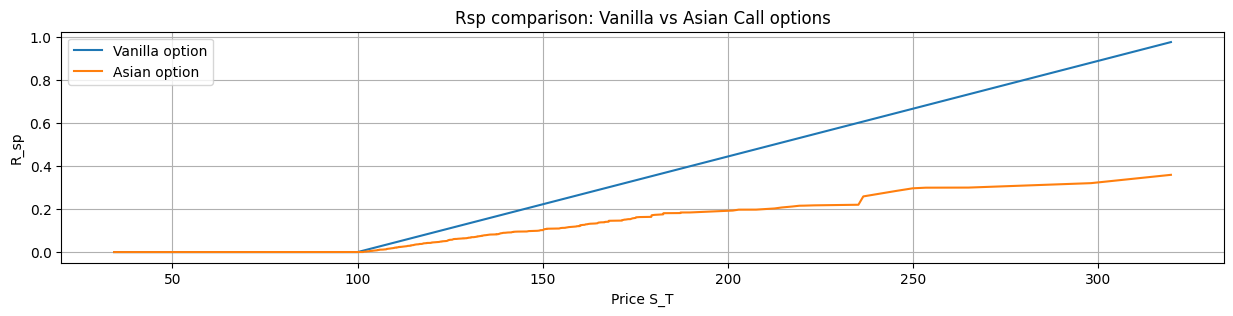

In [ ]:
# profit plots
plt.figure(figsize=(15,3))
plt.title('Rsp comparison: Vanilla vs Asian Call options')
rsps = np.maximum(rsp_min, rsp_min + PR * (S[:, -1] - S0)/S0)
plt.plot(sorted(S[:, -1]), sorted(rsps), label='Vanilla option')
rsps2 = np.maximum(rsp_min, rsp_min + PR * payoffs/S0)
plt.plot(sorted(S[:, -1]), sorted(rsps2), label='Asian option')
plt.legend();plt.grid()
plt.ylabel('R_sp')
plt.xlabel('Price S_T')
# according to that payoff for an asian option is dependent on average asset price during the history
# the profit for this product is growth much slower than the one for vanilla option
# but
# it's not necessary has profit starting from price = S0 as below since we plotted only last price
# not average one, so actually it's possible to have positive pnl starting from price much lower

Geometric average rate call = 9.7904 руб.
Сумма, доступная для покупки опциона = 6760.62 руб.
Коэффициент участия = 6905340.59%

Аритметический опцион колл (MC): 6.9477 руб.
Аритметический опцион колл (MC с Control Variate): 9.6582 руб.
Точное значение геометрического опциона колл: 9.7904 руб.
Доверительный интервал для аритметического опциона колл: [6.2489, 7.6465] руб.
Доверительный интервал для аритметического опциона колл с Control Variate: [9.6317, 9.6847] руб.

Сравнение результатов:
Стоимость азиатского опциона колл (метод Монте-Карло без Control Variate): 6.9477 руб.
Стоимость азиатского опциона колл (метод Монте-Карло с Control Variate): 9.6582 руб.
Точное значение геометрического опциона колл: 9.7904 руб.
Доверительный интервал (без Control Variate): [6.2489, 7.6465] руб.
Доверительный интервал (с Control Variate): [9.6317, 9.6847] руб.


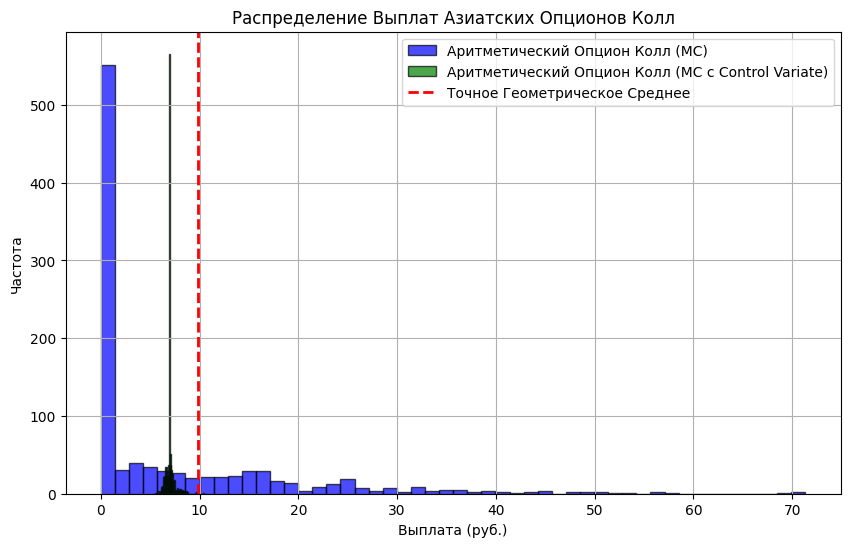

NameError: name 'P_avg' is not defined

In [ ]:
import math

def Geometric_Average_Rate_Call(S, K, T, r, b, sigma, n):
    sigma_sq = sigma ** 2
    sigma_A = sigma * np.sqrt((n + 1) / (2 * n))
    b_A = 0.5 * (b - sigma_sq / (n + 1))
    d1 = (np.log(S / K) + (b_A + 0.5 * sigma_A ** 2) * T) / (sigma_A * np.sqrt(T))
    d2 = d1 - sigma_A * np.sqrt(T)
    option_price = S * np.exp((b_A - r) * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return option_price

def gbm_mcs(mu, sigma, S0, T, n, noOfPaths):
    dt = T / n
    Z = np.random.standard_normal((noOfPaths, n))
    S = S0 * np.exp(np.cumsum((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z, axis=1))
    S = np.concatenate((np.full((noOfPaths, 1), S0), S), axis=1)
    return S

def asian_option_payoffs(S, K, r, T):
    P_avg = S.mean(axis=1)
    P_geom_avg = np.exp(np.log(S).mean(axis=1))
    payoff_arith = np.maximum(P_avg - K, 0)
    payoff_geom = np.maximum(P_geom_avg - K, 0)
    return payoff_arith, payoff_geom

initial_investment = 100_000 
S0 = 100                      
K = 100                        
T = 1                          
r = 0.07                        
q = 0.0                        
sigma = 0.3                     
n = 252                         
noOfPaths = 1000                

call_price_geometric = Geometric_Average_Rate_Call(S0, K, T, r, r - q, sigma, n)
print(f"Geometric average rate call = {call_price_geometric:.4f} руб.")

cash = 100_000
PV = cash * np.exp(-r * T)  
option_investment = cash - PV
print(f"Сумма, доступная для покупки опциона = {option_investment:.2f} руб.")

PR = option_investment / (call_price_geometric * noOfPaths / cash)
print(f"Коэффициент участия = {PR * 100:.2f}%")

S = gbm_mcs(r - 0.5 * sigma**2, sigma, S0, T, n, noOfPaths)


payoff_arith, payoff_geom = asian_option_payoffs(S, K, r, T)

discount_factor = np.exp(-r * T)
call_price_arith_mc = discount_factor * payoff_arith.mean()


call_price_geom_mc = discount_factor * payoff_geom.mean()

call_price_geom_exact = Geometric_Average_Rate_Call(S0, K, T, r, r - q, sigma, n)

cov_matrix = np.cov(payoff_arith, payoff_geom)
cov = cov_matrix[0, 1]
var_geom = cov_matrix[1, 1]
beta = cov / var_geom

call_price_arith_cv = discount_factor * (payoff_arith.mean() + beta * (call_price_geom_exact - payoff_geom.mean()))

confidence_level = 0.95
z = norm.ppf(1 - (1 - confidence_level) / 2)

std_arith = payoff_arith.std(ddof=1)
std_error_arith = discount_factor * std_arith / np.sqrt(noOfPaths)
ci_arith = (call_price_arith_mc - z * std_error_arith, call_price_arith_mc + z * std_error_arith)

std_cv = (payoff_arith - beta * payoff_geom).std(ddof=1)
std_error_cv = discount_factor * std_cv / np.sqrt(noOfPaths)
ci_arith_cv = (call_price_arith_cv - z * std_error_cv, call_price_arith_cv + z * std_error_cv)

print(f"\nАритметический опцион колл (MC): {call_price_arith_mc:.4f} руб.")
print(f"Аритметический опцион колл (MC с Control Variate): {call_price_arith_cv:.4f} руб.")
print(f"Точное значение геометрического опциона колл: {call_price_geom_exact:.4f} руб.")
print(f"Доверительный интервал для аритметического опциона колл: [{ci_arith[0]:.4f}, {ci_arith[1]:.4f}] руб.")
print(f"Доверительный интервал для аритметического опциона колл с Control Variate: [{ci_arith_cv[0]:.4f}, {ci_arith_cv[1]:.4f}] руб.")

print("\nСравнение результатов:")
print(f"Стоимость азиатского опциона колл (метод Монте-Карло без Control Variate): {call_price_arith_mc:.4f} руб.")
print(f"Стоимость азиатского опциона колл (метод Монте-Карло с Control Variate): {call_price_arith_cv:.4f} руб.")
print(f"Точное значение геометрического опциона колл: {call_price_geom_exact:.4f} руб.")
print(f"Доверительный интервал (без Control Variate): [{ci_arith[0]:.4f}, {ci_arith[1]:.4f}] руб.")
print(f"Доверительный интервал (с Control Variate): [{ci_arith_cv[0]:.4f}, {ci_arith_cv[1]:.4f}] руб.")

plt.figure(figsize=(10,6))
plt.hist(discount_factor * payoff_arith, bins=50, alpha=0.7, label='Аритметический Опцион Колл (MC)', color='blue', edgecolor='black')
plt.hist(discount_factor * (payoff_arith + beta * (payoff_geom.mean() - payoff_geom)), bins=50, alpha=0.7, label='Аритметический Опцион Колл (MC с Control Variate)', color='green', edgecolor='black')
plt.axvline(call_price_geom_exact, color='red', linestyle='dashed', linewidth=2, label='Точное Геометрическое Среднее')
plt.title('Распределение Выплат Азиатских Опционов Колл')
plt.xlabel('Выплата (руб.)')
plt.ylabel('Частота')
plt.legend()
plt.grid(True)
plt.show()

rsp = np.maximum(0, 0.855 * (P_avg - S0) / S0)
rsp_mean = rsp.mean()
print(f"\nRsp среднее значение = {rsp_mean * 100:.2f}%")

plt.figure(figsize=(10,6))
plt.hist(rsp * 100, bins=50, alpha=0.7, color='skyblue', edgecolor='black', label='Rsp для Азиатского Опциона Колл')
plt.title('Распределение R_sp для Азиатского Опциона Колл')
plt.xlabel('Rsp (%)')
plt.ylabel('Частота')
plt.legend()
plt.grid(True)
plt.show()

def bs_call_exact(t, s0, k, r, sigma):
    d1 = (math.log(s0 / k) + (r + 0.5 * sigma**2) * t) / (sigma * math.sqrt(t))
    d2 = d1 - sigma * math.sqrt(t)
    return s0 * norm.cdf(d1) - k * math.exp(-r * t) * norm.cdf(d2)

call_price_european = bs_call_exact(T, S0, K, r, sigma)
print(f"Ванильный опцион колл (Блэка-Шоулза): {call_price_european:.4f} руб.")

PR_european = (initial_investment - PV) / (call_price_european * noOfPaths / cash)
print(f"Коэффициент участия для ванильного опциона = {PR_european * 100:.2f}%")

rsp_european = np.maximum(0, PR_european * (S[:,-1] - S0) / S0)
rsp_european_mean = rsp_european.mean()
print(f"Rsp среднее значение для ванильного опциона = {rsp_european_mean * 100:.2f}%")

plt.figure(figsize=(10,6))
plt.hist(rsp * 100, bins=50, alpha=0.7, color='skyblue', edgecolor='black', label='Rsp для Азиатского Опциона Колл')
plt.hist(rsp_european * 100, bins=50, alpha=0.7, color='orange', edgecolor='black', label='Rsp для Ванильного Опциона Колл')
plt.title('Сравнение Распределения R_sp: Азиатский vs Ванильный Опцион Колл')
plt.xlabel('Rsp (%)')
plt.ylabel('Частота')
plt.legend()
plt.grid(True)
plt.show()


# Задача

Сравните различные методы оценивания (арифметический и Монте-Карло) азиатского опциона для бездивидентных акций:
$S_0= 116,79$, $К= 117$, срок погашения составляет 3 месяца. Волатильность акций составляет 0,02803, а безрисковый процент составляет 0,624% с непрерывным начислением процентов.


https://github.com/olof98johansson/FinancialOptionsModelling

https://webthesis.biblio.polito.it/20278/1/tesi.pdf

In [ ]:
# ваш код

# Структурные продукты без гарантии возврата капитала

## Задача.

Имеется 0,1 млн рублей, которые клиент готов инвестировать на 1 год. Ожидается рост цен на акции «A».  Клиент готов нести 30\% потери в случае падении цены акции <<А>> (меньше чем при прямой покупке акции) в обмен на увеличение коэффициента участия. Текущая цена акции 100 руб.

Входные параметры продукта:
*   базовый актив -- акции,
*   срок -- $T = 1$ год,
*   цена начала участия -- $P_0 = 100$рублей,
*   барьерная цена (тип барьера) -- «включаемый» (knock-in) и «выключаемый» (knock-out),
*   условия наблюдения с целью определения пробития барьера -- частота
наблюдений, длина периода наблюдений, расположение периода наблюдений
в случае, если оно частичное – в начале, середине, конце срока продукта;
*   сценарий поведения базового актива -- рост.

Выходной параметр продукта:
*   коэффициент участия.


Проведите расчеты и вычислите коэффициент участия.

In [ ]:

P0 = 100.0        # Начальная цена акции (руб.)
I = 100000.0      # Инвестиционная сумма (руб.)
max_loss = 0.3    # Максимальная допустимая потеря (30%)
P_down = 80.0     # Барьерная цена снижения (руб.)

x = 1 - (P_down / P0)

if x <= 0:
    raise ValueError("Барьерная цена снижения должна быть ниже начальной цены акции.")

alpha = max_loss / x

print(f"Коэффициент участия (alpha) составляет: {alpha:.2f}")


Коэффициент участия (alpha) составляет: 1.50
